In [ ]:
import pandas as pd
df = pd.read_csv("heart_2020_cleaned.csv", nrows=50000)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      50000 non-null  object 
 1   BMI               50000 non-null  float64
 2   Smoking           50000 non-null  object 
 3   AlcoholDrinking   50000 non-null  object 
 4   Stroke            50000 non-null  object 
 5   PhysicalHealth    50000 non-null  float64
 6   MentalHealth      50000 non-null  float64
 7   DiffWalking       50000 non-null  object 
 8   Sex               50000 non-null  object 
 9   AgeCategory       50000 non-null  object 
 10  Race              50000 non-null  object 
 11  Diabetic          50000 non-null  object 
 12  PhysicalActivity  50000 non-null  object 
 13  GenHealth         50000 non-null  object 
 14  SleepTime         50000 non-null  float64
 15  Asthma            50000 non-null  object 
 16  KidneyDisease     50000 non-null  object

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


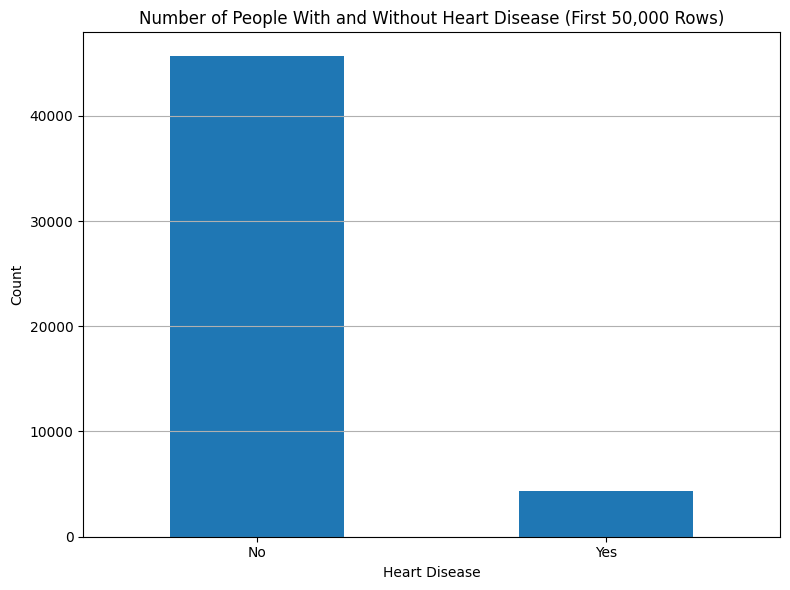

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting the number of people with and without heart disease
plt.figure(figsize=(8, 6))
df['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Number of People With and Without Heart Disease (First 50,000 Rows)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,27.971388,3.539560,3.984260,7.12938
std,6.239799,8.094921,7.979439,1.49613
min,12.400000,0.000000,0.000000,1.00000
25%,23.710000,0.000000,0.000000,6.00000
50%,26.960000,0.000000,0.000000,7.00000
75%,31.010000,2.000000,4.000000,8.00000
max,87.050000,30.000000,30.000000,24.00000


In [ ]:
binary_cols = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Diabetic', 'PhysicalActivity',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]

df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)



C:\Users\modyx\AppData\Local\Temp\ipykernel_21892\1360497000.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
## Male is  1, Female is 0
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})


In [ ]:
df['ComorbidityCount'] = df[['Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']].sum(axis=1)

In [ ]:
df['UnhealthyDays'] = df['PhysicalHealth'] + df['MentalHealth']
df['UnhealthyDays'] = df['UnhealthyDays'].clip(upper=30)

In [ ]:
df['RiskBehavior'] = ((df['Smoking'] == 1) | (df['AlcoholDrinking'] == 1)).astype(int)

In [ ]:
df['SleepCategory'] = pd.cut(df['SleepTime'],
                             bins=[0, 5, 6.9, 8.9, 24],
                             labels=['Very Short', 'Short', 'Normal', 'Long'])


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ComorbidityCount,UnhealthyDays,RiskBehavior,SleepCategory
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,Very good,5.0,1,0,1,3,30.0,1,Very Short
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,Very good,7.0,0,0,0,1,0.0,0,Normal
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,Fair,8.0,1,0,0,2,30.0,1,Normal
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,Good,6.0,0,0,1,1,0.0,0,Short
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,Very good,8.0,0,0,0,0,28.0,0,Normal


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'ComorbidityCount',
       'UnhealthyDays', 'RiskBehavior', 'SleepCategory'],
      dtype='object')

In [ ]:
df.to_csv("heart_cleaned_final.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
import pickle


X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Save each set as a Pickle (.p) file
pickle.dump(X_train, open("X_train.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_train, open("y_train.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))

print("Pickle files saved successfully!")


Pickle files saved successfully!


/var/folders/66/l7dnx1g128b7j804pfwmzc480000gn/T/ipykernel_32451/4278937313.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


Confusion Matrix:
[[13455   239]
 [ 1164   142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13694
           1       0.37      0.11      0.17      1306

    accuracy                           0.91     15000
   macro avg       0.65      0.55      0.56     15000
weighted avg       0.87      0.91      0.88     15000


Accuracy Score: 0.9064666666666666


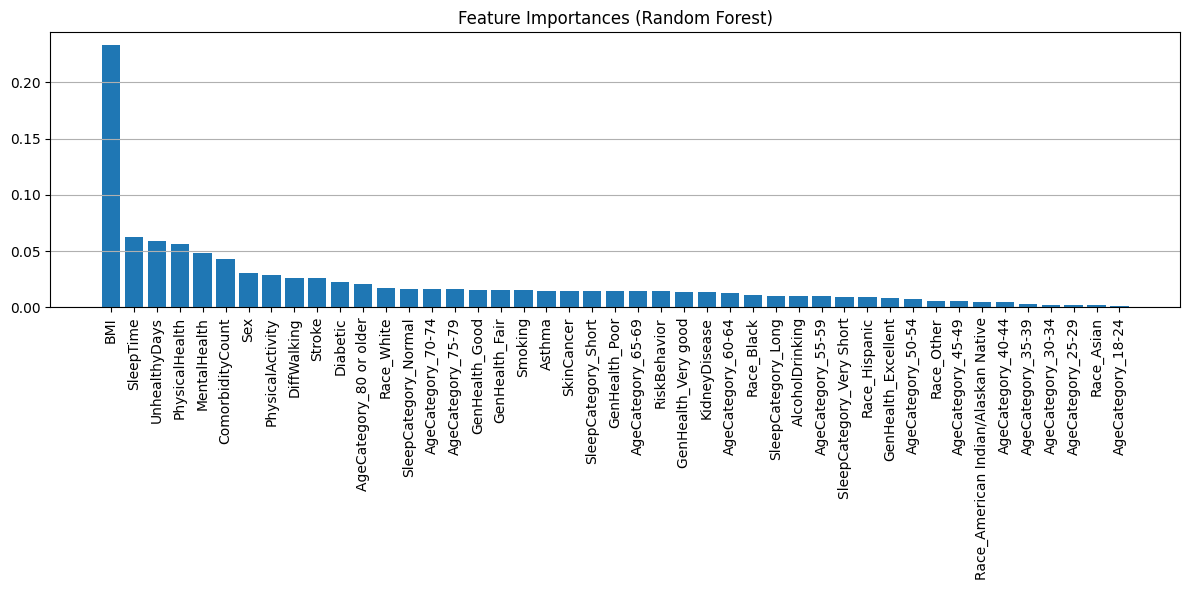

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 2. Load and preprocess the data
df = pd.read_csv("heart_2020_cleaned.csv", nrows=50000)

# Convert binary columns
binary_cols = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Diabetic', 'PhysicalActivity',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Convert Sex
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Feature engineering
df['ComorbidityCount'] = df[['Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']].sum(axis=1)
df['UnhealthyDays'] = (df['PhysicalHealth'] + df['MentalHealth']).clip(upper=30)
df['RiskBehavior'] = ((df['Smoking'] == 1) | (df['AlcoholDrinking'] == 1)).astype(int)
df['SleepCategory'] = pd.cut(df['SleepTime'],
                             bins=[0, 5, 6.9, 8.9, 24],
                             labels=['Very Short', 'Short', 'Normal', 'Long'])

# One-hot encode all categorical (object) features
df = pd.get_dummies(df)

# Drop rows with missing values
df = df.dropna()

# 3. Train-test split
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Evaluate model
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 6. Feature Importance Plot
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# 7. Save model and data splits
pickle.dump(rf_model, open("random_forest_model.p", "wb"))
pickle.dump(X_train, open("X_train.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_train, open("y_train.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))


